In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
from keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from keras import backend, models, layers, optimizers
from keras.layers import Dense, Flatten

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import scipy

In [24]:
# Construct the path to each desired file
base_path = "input/"

train_dir = base_path + "train/"
valid_dir = base_path + "valid/"
test_dir = base_path + "test/"

In [25]:
# Data will flow through this generator and will normalize
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# Moves data from their respective directories to the model
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

valid_gen = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### Building Model

Now that the data generators have been built, it is time to test a few different architectures in order to determine the most promising. Due to time constraints and my success with transfer learning, I will explore a few of these methods. Transfer Learning is a series of pre-built models using various architectures, pre-trained for excellent performance on the ImageNet dataset.

I will be testing 3 different architectures: VGG16, ResNet50v2, and InceptionV3.

VGG16 is commonly used in image recognition applications because of its design that is lighter-weight and faster than other architectures while maintaining respectable accuracy. ResNet50v2 proved to be a rather robust design in my previous tests, while also being faster and more accurate than VGG16 on the ImageNet data. InceptionV3 was negligibly faster and more accurate than ResNet50v2 on the ImageNet data.

There are more accurate/faster architectures, but in an effort to balance these two factors (which appear to be inversely proportional) I have settled on these three architectures for testing. Once I compare the models on this data, I will then decide on which model to use for further tuning.

While I do plan on use data augmentation, this is something I will introduce to the chosen model later.

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import InceptionV3

In [28]:
# setting up base model
backend.clear_session()

vgg_base = VGG16(weights = 'imagenet',
                include_top = False,
                input_shape = (224,224,3))

resnet_base = ResNet50V2(weights = 'imagenet',
                        include_top = False,
                        input_shape = (224, 224, 3))

inception_base = InceptionV3(weights = 'imagenet',
                            include_top = False,
                            input_shape = (224, 224, 3))

In [29]:
# Ensuring weights do not change
vgg_base.trainable = False
resnet_base.trainable = False
inception_base.trainable = False

In [30]:
# model creation
# VGG16
model_vgg = models.Sequential()
model_vgg.add(vgg_base)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(1028, activation='relu'))
model_vgg.add(layers.Dense(315, activation='softmax'))

# ResNet50V2
model_resnet = models.Sequential()
model_resnet.add(resnet_base)
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dense(1028, activation='relu'))
model_resnet.add(layers.Dense(315, activation='softmax'))

# InceptionV3
model_inception = models.Sequential()
model_inception.add(inception_base)
model_inception.add(layers.Flatten())
model_inception.add(layers.Dense(1028, activation='relu'))
model_inception.add(layers.Dense(315, activation='softmax'))

In [31]:
# Compiling models
# VGG16
model_vgg.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

# ResNet50V2
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

# InceptionV3
model_inception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                       loss = 'categorical_crossentropy',
                       metrics = ['accuracy'])

In [32]:
# Fit VGG16 model and store information
history_vgg = model_vgg.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 75,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_vgg = history_vgg.history
loss_values_vgg = history_dict_vgg['loss']
val_loss_values_vgg = history_dict_vgg['val_loss']
acc_values_vgg = history_dict_vgg['accuracy']
val_acc_values_vgg = history_dict_vgg['val_accuracy']
epochs_vgg = range(1, len(history_dict_vgg['accuracy']) +1)

Epoch 1/75
100/100 [==============================] - 181s 2s/step - loss: 5.8293 - accuracy: 0.0120 - val_loss: 5.6397 - val_accuracy: 0.0260
Epoch 2/75
100/100 [==============================] - 213s 2s/step - loss: 5.5263 - accuracy: 0.0390 - val_loss: 5.4321 - val_accuracy: 0.0390
Epoch 3/75
100/100 [==============================] - 169s 2s/step - loss: 5.2327 - accuracy: 0.0815 - val_loss: 5.1100 - val_accuracy: 0.1060
Epoch 4/75
100/100 [==============================] - 164s 2s/step - loss: 4.9637 - accuracy: 0.1105 - val_loss: 4.7976 - val_accuracy: 0.1430
Epoch 5/75
100/100 [==============================] - 199s 2s/step - loss: 4.5367 - accuracy: 0.1720 - val_loss: 4.4786 - val_accuracy: 0.1580
Epoch 6/75
100/100 [==============================] - 216s 2s/step - loss: 4.2415 - accuracy: 0.2165 - val_loss: 4.0734 - val_accuracy: 0.2390
Epoch 7/75
100/100 [==============================] - 253s 3s/step - loss: 3.9130 - accuracy: 0.2560 - val_loss: 3.8477 - val_accuracy: 0.2270

Epoch 58/75
100/100 [==============================] - 159s 2s/step - loss: 0.6853 - accuracy: 0.8715 - val_loss: 0.9590 - val_accuracy: 0.7650
Epoch 59/75
100/100 [==============================] - 187s 2s/step - loss: 0.7560 - accuracy: 0.8380 - val_loss: 0.9807 - val_accuracy: 0.7740
Epoch 60/75
100/100 [==============================] - 177s 2s/step - loss: 0.6658 - accuracy: 0.8720 - val_loss: 1.0046 - val_accuracy: 0.7620
Epoch 61/75
100/100 [==============================] - 152s 2s/step - loss: 0.6159 - accuracy: 0.8775 - val_loss: 0.8869 - val_accuracy: 0.7990
Epoch 62/75
100/100 [==============================] - 142s 1s/step - loss: 0.7101 - accuracy: 0.8580 - val_loss: 0.9814 - val_accuracy: 0.7680
Epoch 63/75
100/100 [==============================] - 149s 1s/step - loss: 0.6415 - accuracy: 0.8760 - val_loss: 0.9493 - val_accuracy: 0.7630
Epoch 64/75
100/100 [==============================] - 150s 2s/step - loss: 0.6227 - accuracy: 0.8730 - val_loss: 0.9516 - val_accuracy:

In [33]:
# Fit ResNet50V2 model and store information
history_resnet = model_resnet.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 75,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_resnet = history_resnet.history
loss_values_resnet = history_dict_resnet['loss']
val_loss_values_resnet = history_dict_resnet['val_loss']
acc_values_resnet = history_dict_resnet['accuracy']
val_acc_values_resnet = history_dict_resnet['val_accuracy']
epochs_resnet = range(1, len(history_dict_resnet['accuracy']) +1)

Epoch 1/75
100/100 [==============================] - 102s 970ms/step - loss: 5.2092 - accuracy: 0.1710 - val_loss: 3.7075 - val_accuracy: 0.3150
Epoch 2/75
100/100 [==============================] - 90s 904ms/step - loss: 3.3005 - accuracy: 0.3735 - val_loss: 2.6658 - val_accuracy: 0.4460
Epoch 3/75
100/100 [==============================] - 92s 926ms/step - loss: 2.4340 - accuracy: 0.4975 - val_loss: 1.9683 - val_accuracy: 0.5570
Epoch 4/75
100/100 [==============================] - 96s 950ms/step - loss: 1.9085 - accuracy: 0.5850 - val_loss: 1.7296 - val_accuracy: 0.6040
Epoch 5/75
100/100 [==============================] - 102s 1s/step - loss: 1.6429 - accuracy: 0.6435 - val_loss: 1.4309 - val_accuracy: 0.6810
Epoch 6/75
100/100 [==============================] - 97s 973ms/step - loss: 1.5055 - accuracy: 0.6665 - val_loss: 1.2268 - val_accuracy: 0.7120
Epoch 7/75
100/100 [==============================] - 100s 1s/step - loss: 1.4047 - accuracy: 0.7040 - val_loss: 1.1444 - val_accur

100/100 [==============================] - 105s 951ms/step - loss: 0.2711 - accuracy: 0.9360 - val_loss: 0.8218 - val_accuracy: 0.8350
Epoch 58/75
100/100 [==============================] - 97s 976ms/step - loss: 0.2465 - accuracy: 0.9415 - val_loss: 0.8172 - val_accuracy: 0.8440
Epoch 59/75
100/100 [==============================] - 115s 1s/step - loss: 0.2429 - accuracy: 0.9435 - val_loss: 0.7205 - val_accuracy: 0.8590
Epoch 60/75
100/100 [==============================] - 105s 1s/step - loss: 0.3013 - accuracy: 0.9465 - val_loss: 0.7288 - val_accuracy: 0.8460
Epoch 61/75
100/100 [==============================] - 96s 948ms/step - loss: 0.2000 - accuracy: 0.9505 - val_loss: 0.6657 - val_accuracy: 0.8720
Epoch 62/75
100/100 [==============================] - 93s 914ms/step - loss: 0.2146 - accuracy: 0.9575 - val_loss: 0.6974 - val_accuracy: 0.8590
Epoch 63/75
100/100 [==============================] - 111s 1s/step - loss: 0.2492 - accuracy: 0.9425 - val_loss: 0.7371 - val_accuracy: 0.

In [34]:
# Fit InceptionV3 model and store information
history_inception = model_inception.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 75,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_inception = history_inception.history
loss_values_inception = history_dict_inception['loss']
val_loss_values_inception = history_dict_inception['val_loss']
acc_values_inception = history_dict_inception['accuracy']
val_acc_values_inception = history_dict_inception['val_accuracy']
epochs_inception = range(1, len(history_dict_inception['accuracy']) +1)

Epoch 1/75
100/100 [==============================] - 64s 548ms/step - loss: 5.3534 - accuracy: 0.1200 - val_loss: 4.3273 - val_accuracy: 0.1880
Epoch 2/75
100/100 [==============================] - 54s 539ms/step - loss: 3.6974 - accuracy: 0.2625 - val_loss: 3.0369 - val_accuracy: 0.3530
Epoch 3/75
100/100 [==============================] - 56s 558ms/step - loss: 2.8501 - accuracy: 0.3865 - val_loss: 2.3817 - val_accuracy: 0.4320
Epoch 4/75
100/100 [==============================] - 56s 563ms/step - loss: 2.3101 - accuracy: 0.4640 - val_loss: 1.7738 - val_accuracy: 0.5500
Epoch 5/75
100/100 [==============================] - 56s 562ms/step - loss: 1.9732 - accuracy: 0.5395 - val_loss: 1.6731 - val_accuracy: 0.5710
Epoch 6/75
100/100 [==============================] - 54s 545ms/step - loss: 1.6559 - accuracy: 0.5880 - val_loss: 1.4443 - val_accuracy: 0.6310
Epoch 7/75
100/100 [==============================] - 53s 535ms/step - loss: 1.5394 - accuracy: 0.6215 - val_loss: 1.3631 - val_ac

100/100 [==============================] - 54s 534ms/step - loss: 0.3693 - accuracy: 0.8980 - val_loss: 0.5906 - val_accuracy: 0.8560
Epoch 58/75
100/100 [==============================] - 55s 529ms/step - loss: 0.3633 - accuracy: 0.8975 - val_loss: 0.5099 - val_accuracy: 0.8430
Epoch 59/75
100/100 [==============================] - 44s 445ms/step - loss: 0.3272 - accuracy: 0.9075 - val_loss: 0.6670 - val_accuracy: 0.8310
Epoch 60/75
100/100 [==============================] - 44s 441ms/step - loss: 0.3098 - accuracy: 0.9095 - val_loss: 0.5025 - val_accuracy: 0.8690
Epoch 61/75
100/100 [==============================] - 45s 446ms/step - loss: 0.2765 - accuracy: 0.9190 - val_loss: 0.5331 - val_accuracy: 0.8460
Epoch 62/75
100/100 [==============================] - 49s 491ms/step - loss: 0.3128 - accuracy: 0.9045 - val_loss: 0.5530 - val_accuracy: 0.8480
Epoch 63/75
100/100 [==============================] - 53s 534ms/step - loss: 0.3332 - accuracy: 0.9030 - val_loss: 0.5786 - val_accurac

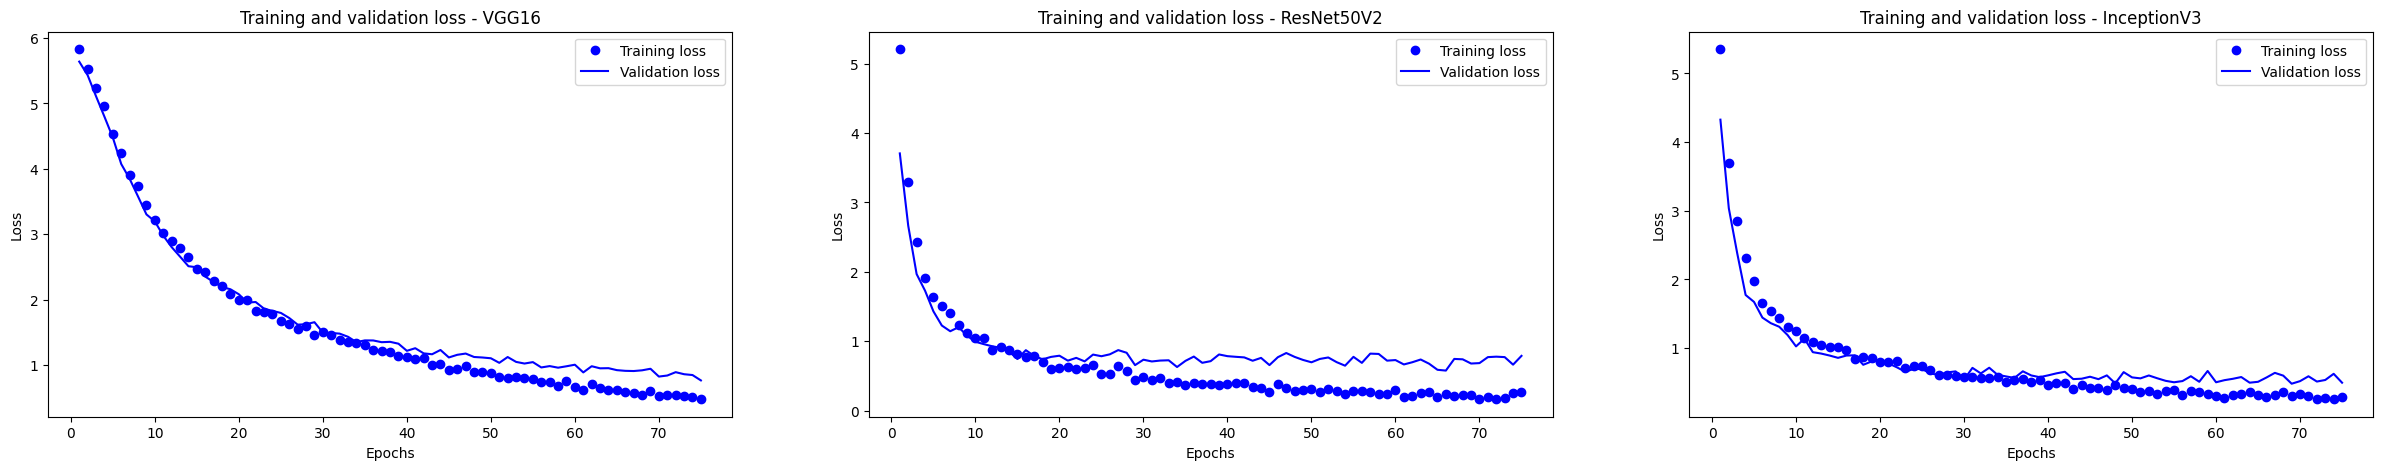

In [35]:
# Plotting Training loss vs Validation loss for comparison
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.plot(epochs_vgg, loss_values_vgg, 'bo', label = 'Training loss')
plt.plot(epochs_vgg, val_loss_values_vgg, 'b', label = 'Validation loss')
plt.title('Training and validation loss - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(132)
plt.plot(epochs_resnet, loss_values_resnet, 'bo', label = 'Training loss')
plt.plot(epochs_resnet, val_loss_values_resnet, 'b', label = 'Validation loss')
plt.title('Training and validation loss - ResNet50V2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(133)
plt.plot(epochs_inception, loss_values_inception, 'bo', label = 'Training loss')
plt.plot(epochs_inception, val_loss_values_inception, 'b', label = 'Validation loss')
plt.title('Training and validation loss - InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

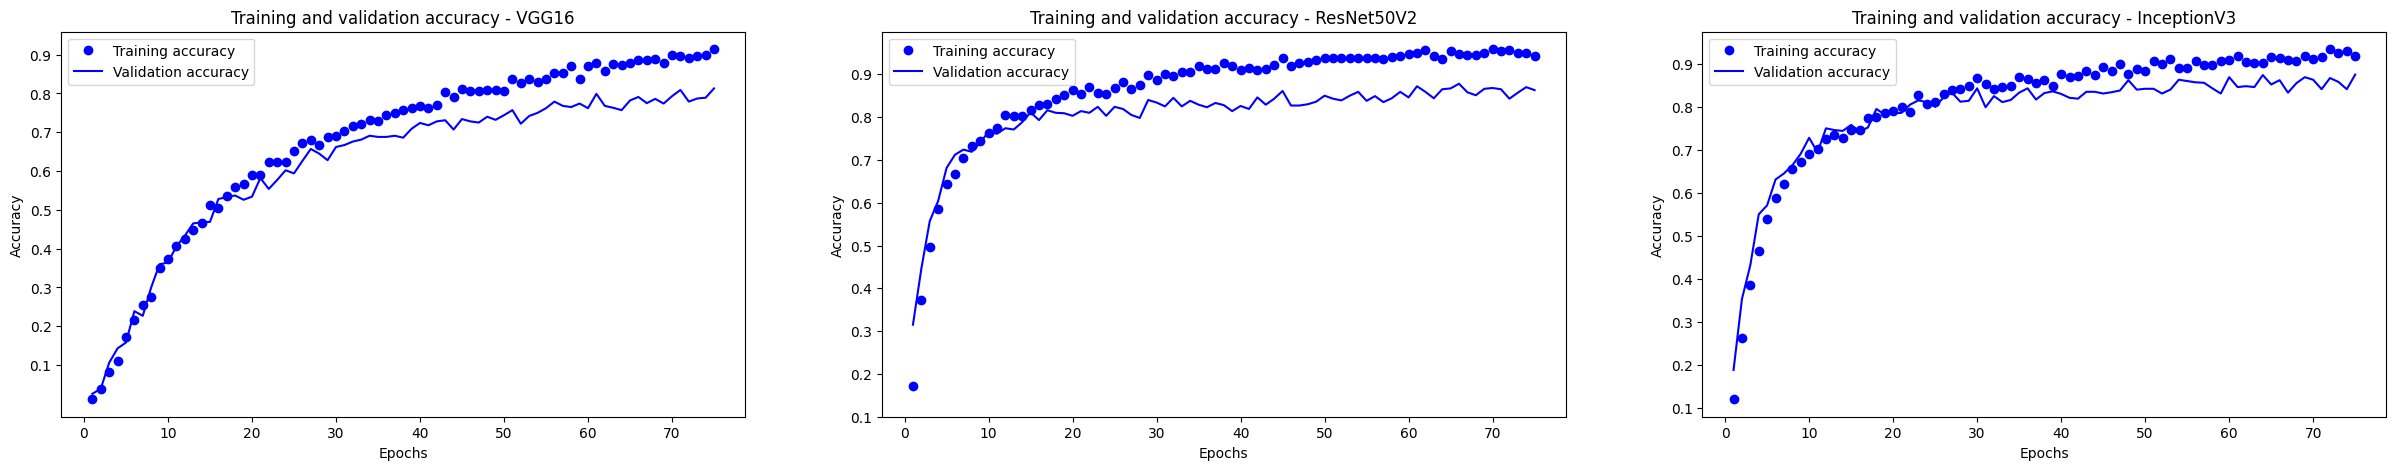

In [39]:
# Plotting Training accuracy vs Validation accuracy for comparison
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.plot(epochs_vgg, acc_values_vgg, 'bo', label = 'Training accuracy')
plt.plot(epochs_vgg, val_acc_values_vgg, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - VGG16')
plt.xlabel('Epochs')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(132)
plt.plot(epochs_resnet, acc_values_resnet, 'bo', label = 'Training accuracy')
plt.plot(epochs_resnet, val_acc_values_resnet, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - ResNet50V2')
plt.xlabel('Epochs')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(133)
plt.plot(epochs_inception, acc_values_inception, 'bo', label = 'Training accuracy')
plt.plot(epochs_inception, val_acc_values_inception, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.xlabel('Epochs')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model Discussion

It can be difficult to tell apart each model in this case. Each appears to be still training with a chance of having better results. This is largely due to the small learning rate attached to each model. However, larger learning rates saw drastically increased volatility and much worse accuracy for this dataset. I was unable to gather any insight from these higher learning rates (testing 0.01 and 0.001 values). As a result, a smaller learning rate with a higher number of epochs is the correct approach being used. The main concern related to this approach is the weights getting stuck at a local minimum rather than finding the correct area of the global minimum. Additionally, training times increase becuase it takes more epochs to find optimal weights. For the sake of model comparison I will accept these potential faults, especially since the results are much easier to read, much less volatility is present in the output, the accuracy (both training and validation) reach much higher maximas, and the loss (both training and validation) reach much lower minimas.

In regards to compared model performance between the three architectures, It is difficult to determine which model is best to proceed with. VGG16 appears to be gradually improving still, but is still approximately 10% behind the other two models in terms of accuracy. It is unclear whether or not it will achieve the same accuracy, and so I would prefer not to select the VGG16 model. 

The decision between ResNet50V2 and InceptionV3 is very interesting considering the very similar progression between the two models. Both achieve similar maximum validation accuracy (87.8% for ResNet50V2 and 87.5% for InceptionV3). However, there is more meaningful separation between the training and validation accuracy in the ResNet50V2 model. This signals more possible improvement with hyperparameter tuning. Therefore, I will proceed with using the ResNet50V2.

It is possible that with more epochs, the VGG16 model becomes comparable to the other two architectures, but it is not certain after 75 epochs. Additionally, InceptionV3 and ResNet50V2 have performed similarly. However, there is a plateau in results that occur sooner in the ResNet50V2 that could signal more impactful change being possible by properly tuning that model architecture.